## **Retrieve dataset as a DataFrame**

In [4]:
from download_dataset import dataset
import pandas as pd

d = dataset()
df = d.get_dataframe()

print(df.head())  # Display the first few rows of the DataFrame


.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

=================   ============
Classes                        7
Samples total             581012
Dimensionality                54
Features                     int
=================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional argument 'as_frame' is
se

## **EDA Round 1 - Distributions**

##### Tools: Data Wrangler, Seaborne, Matplotlib

##### **save dataset to CSV**

In [5]:
df.to_csv('cover_type.csv', index=False)  # Save dataset as a CSV to use Data Wrangler


### Sunlight-related Feature Distributions

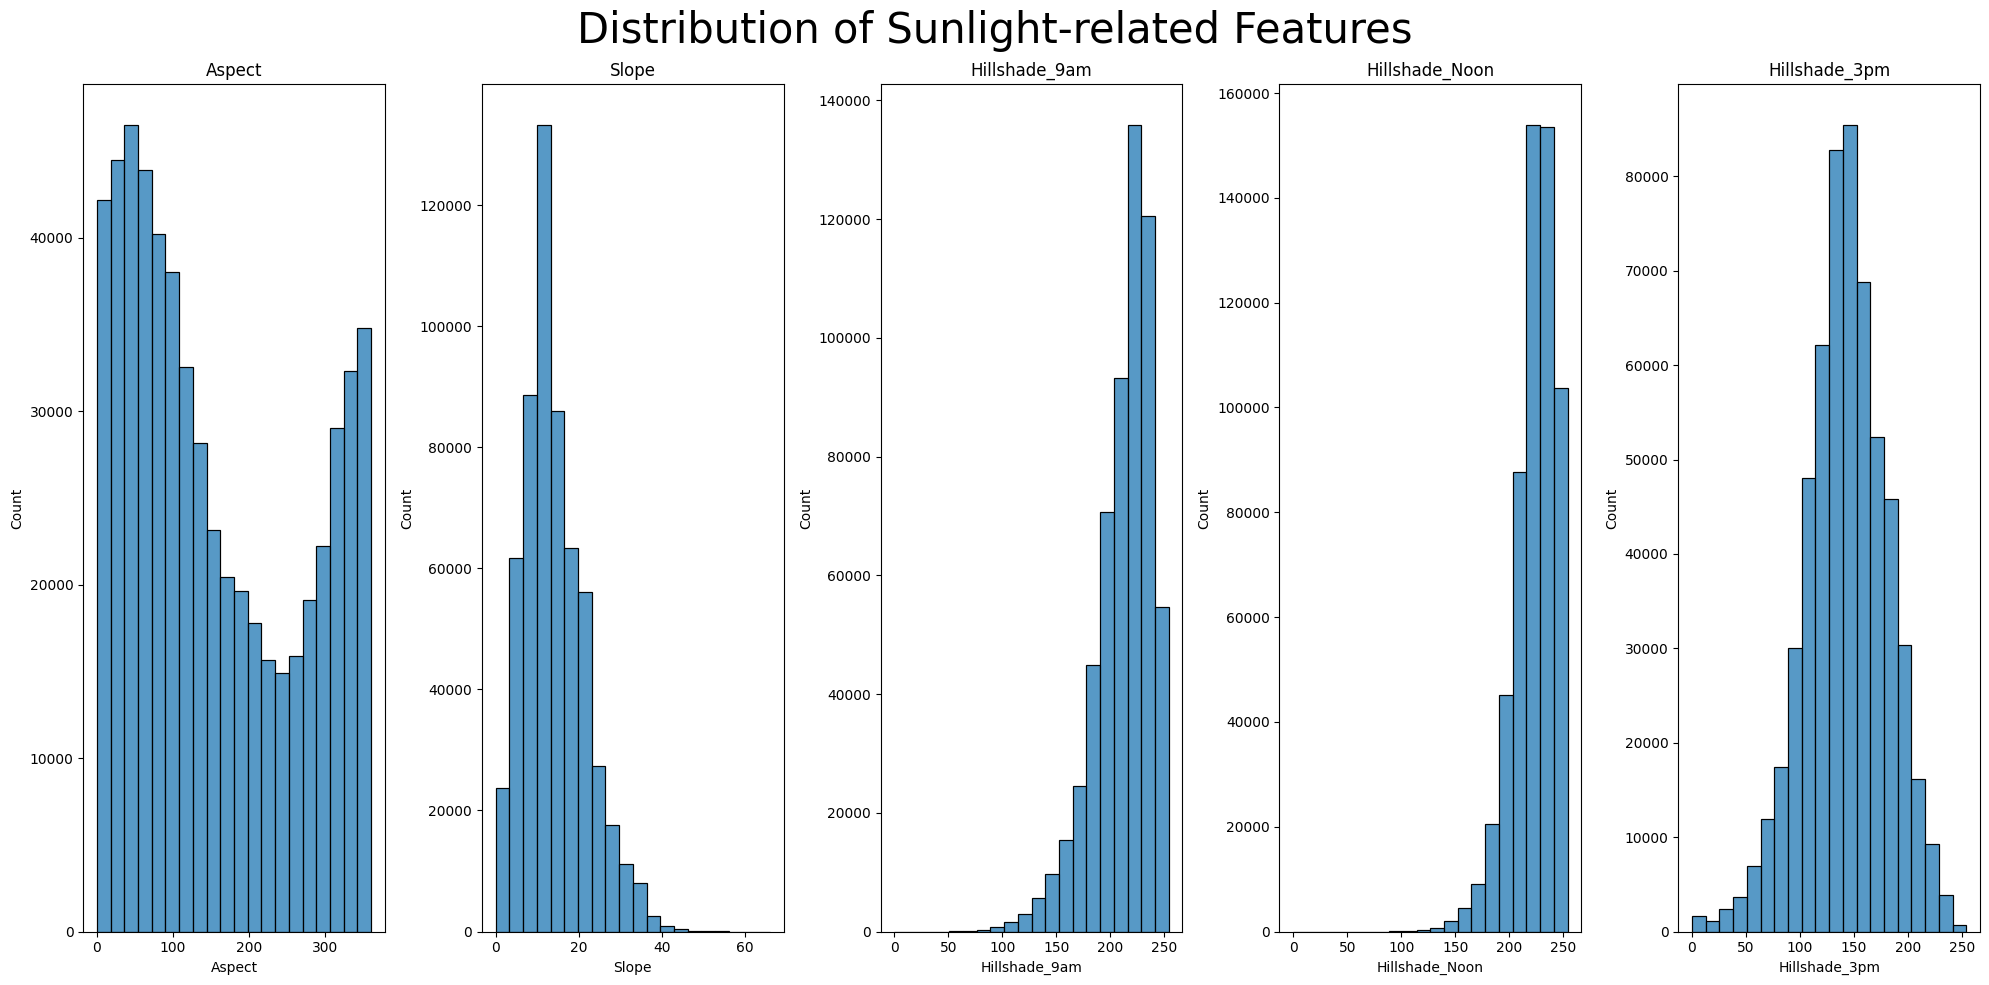

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for numerical features
fig, axes = plt.subplots(1, 5, figsize=(20, 10))
fig.suptitle('Distribution of Sunlight-related Features', fontsize=30)

# List of numerical features
sunlight = ['Aspect', 'Slope', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']

# Create histograms for each feature
for col, feature in enumerate(sunlight):
        sns.histplot(data=df, x=feature, bins=20, ax=axes[col]) # ax = array. 1D arrays initialized with only columns
        axes[col].set_title(f'{feature}')

plt.tight_layout()
plt.show()


### Distance-related Feature Distributions

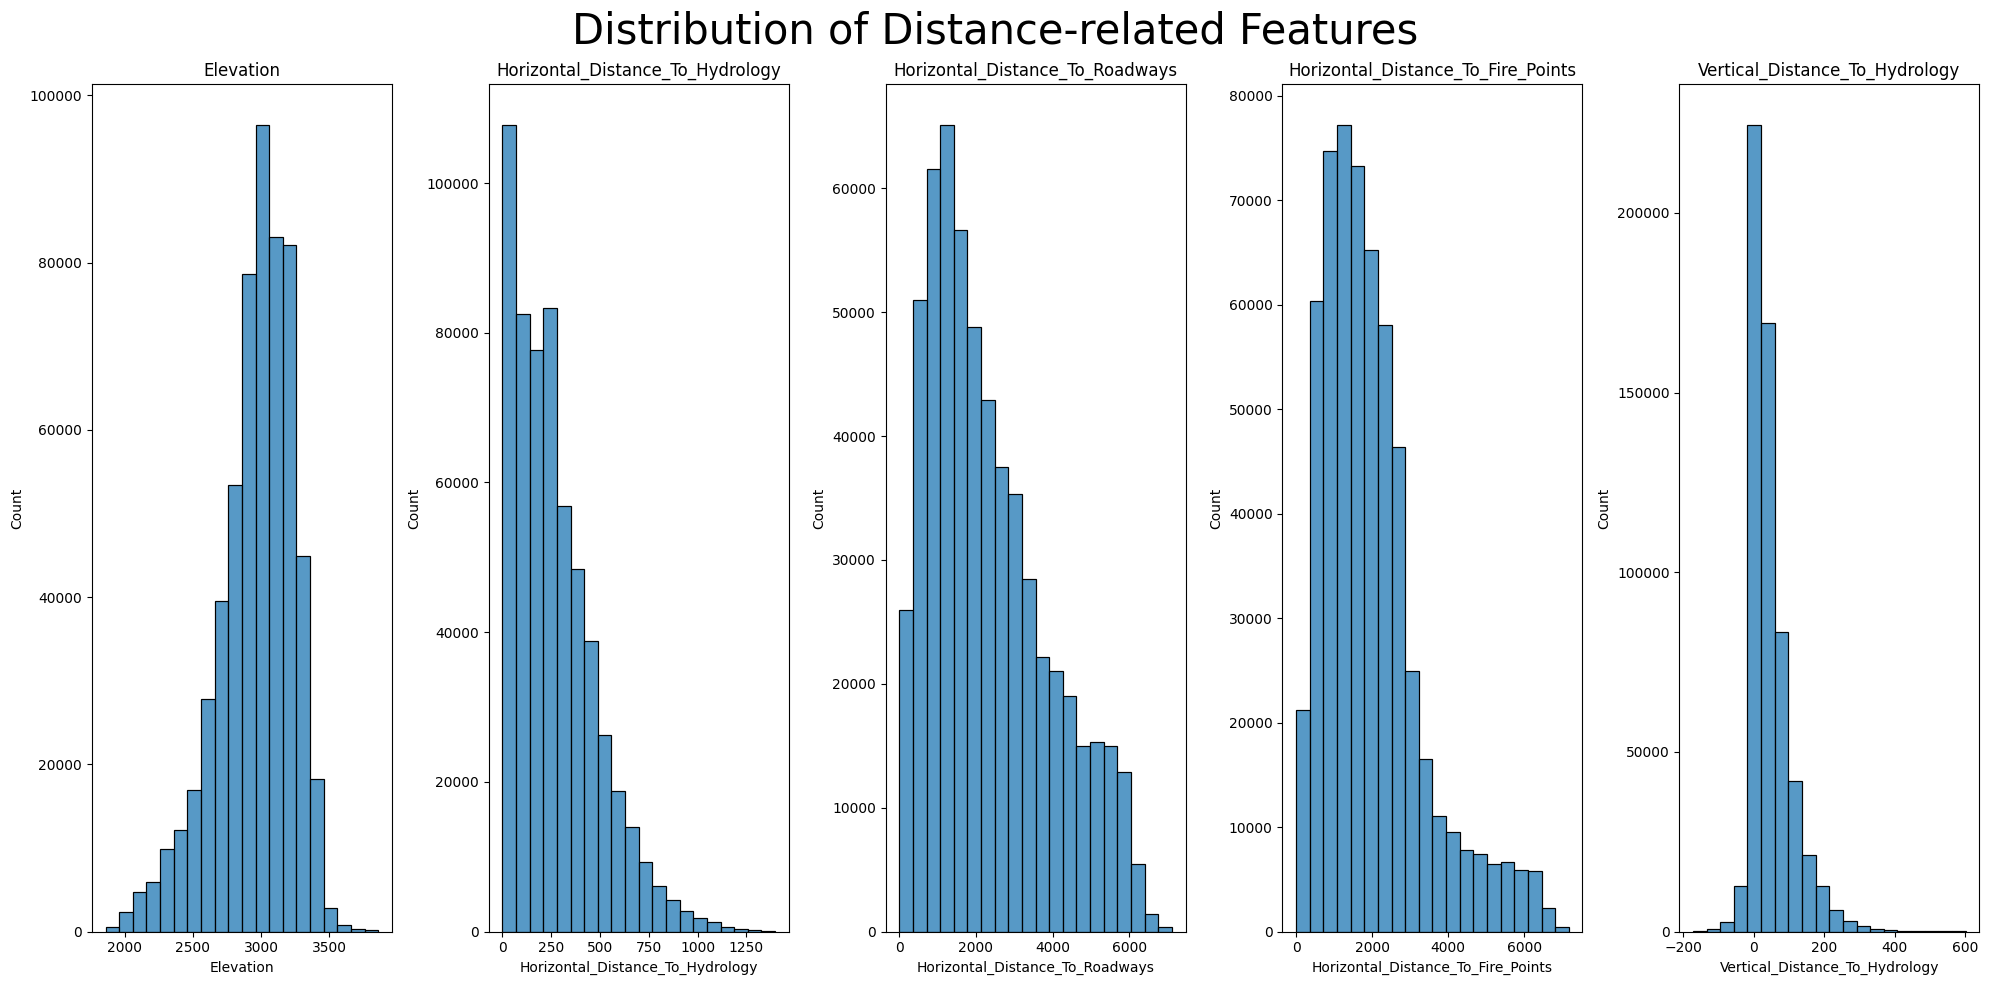

In [7]:
# create subplot space
fig, axes = plt.subplots(1, 5, figsize=(20, 10))
fig.suptitle('Distribution of Distance-related Features', fontsize=30)

distance = ['Elevation', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                'Horizontal_Distance_To_Fire_Points', 'Vertical_Distance_To_Hydrology']

for col, feature in enumerate(distance):
        sns.histplot(data=df, x=feature, bins=20, ax=axes[col]) # ax = array. 1D arrays initialized with only columns
        axes[col].set_title(f'{feature}')

plt.tight_layout()
plt.show()


### Wilderness Area Feature Distributions

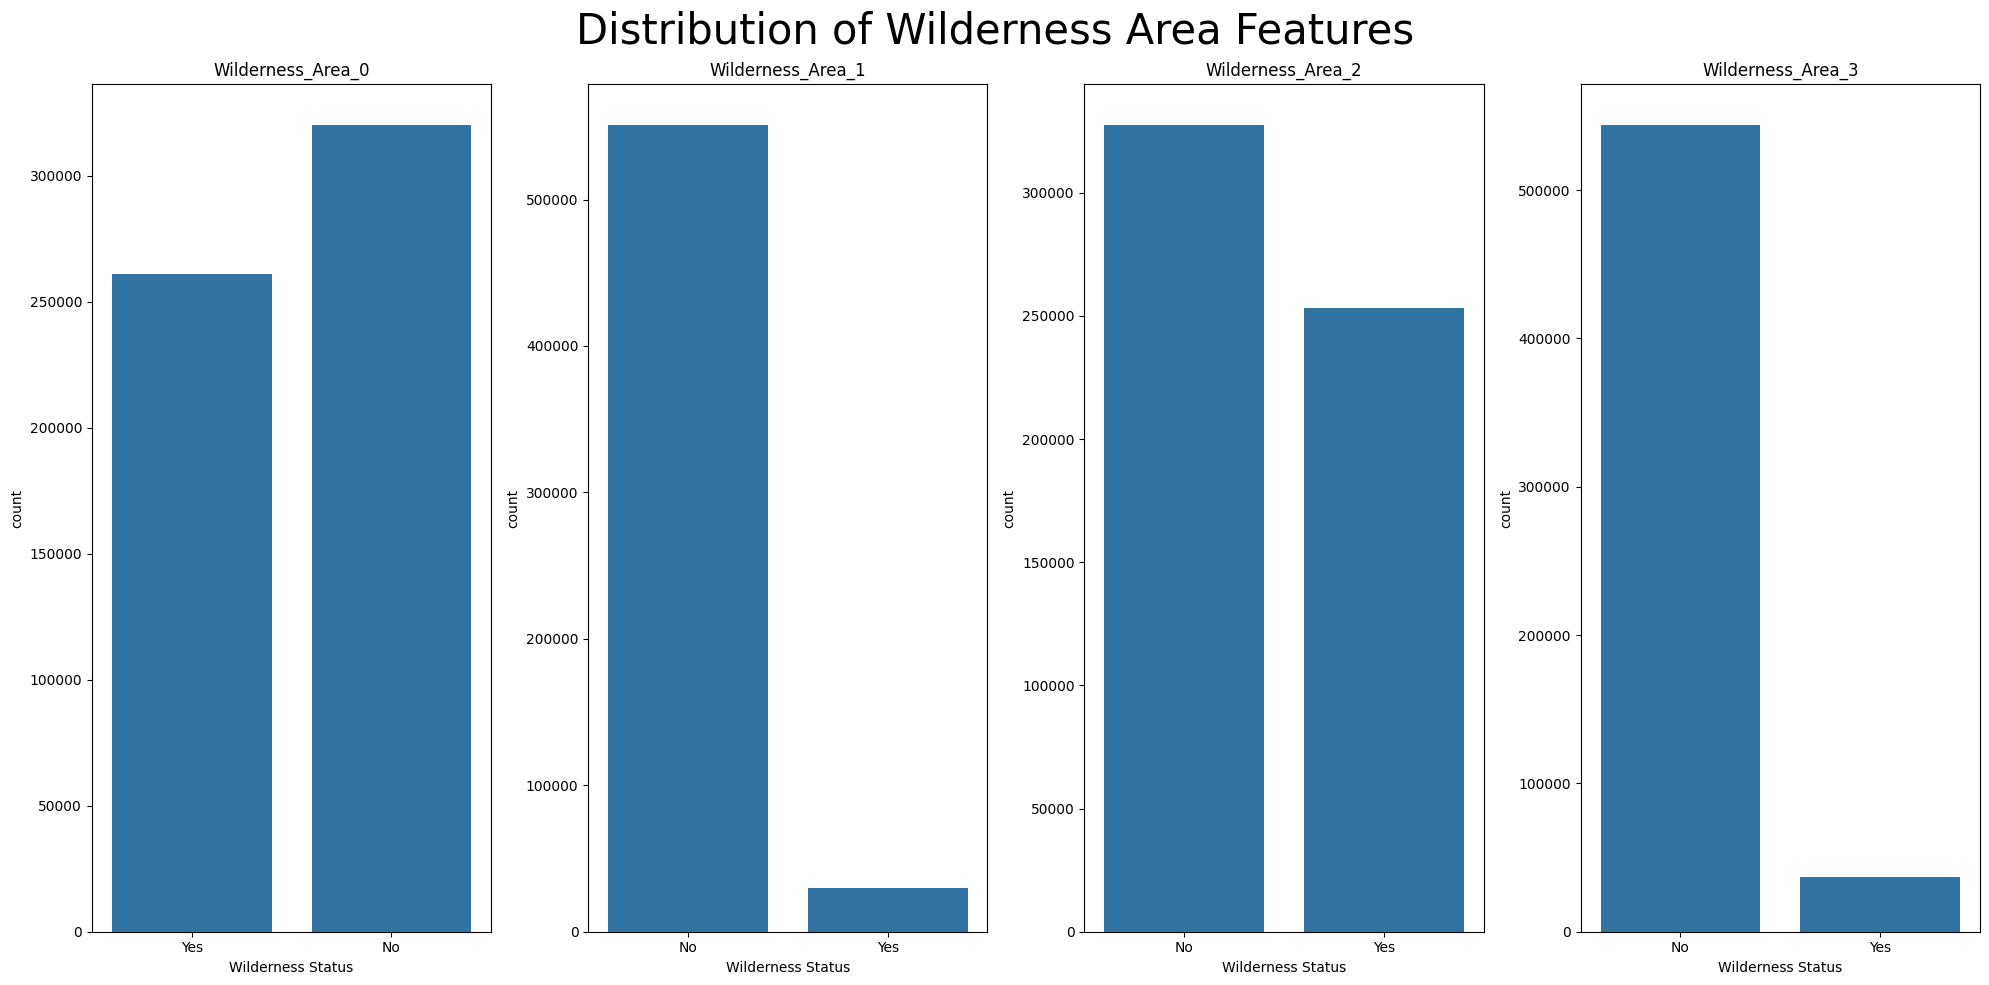

In [8]:
fig, axes = plt.subplots(1, 4, figsize=(20, 10))
fig.suptitle('Distribution of Wilderness Area Features', fontsize=30)
wilderness_features = ['Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3']

# dictionary assigning representative labels for categorical values
categorical_map = {
        
        'binary': {0: 'No', 1: 'Yes'},
        'cover_type': {1: 'Spruce/Fir', 2: 'Lodgepole Pine', 3: 'Ponderosa Pine', 
                        4: 'Cottonwood/Willow', 5: 'Aspen', 6: 'Douglas-fir', 7: 'Krummholz'}
        
        }

for col, feature in enumerate(wilderness_features):

        renamed_data = df[feature].map(categorical_map['binary'])  # Map binary values to 'No'/'Yes'
        sns.countplot(x=renamed_data, ax=axes[col]) # uses renamed_data as data, ax = array. 1D arrays initialized with only columns
        axes[col].set_title(f'{feature}')
        axes[col].set_xlabel("Wilderness Status")  # Set tick positions first

plt.tight_layout()
plt.show()
